**Загрузка данных**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_palette('husl')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
dataset = pd.read_csv('/content/Depression Student Dataset.csv')

In [ ]:
dataset.drop(columns=['Have you ever had suicidal thoughts ?'], inplace=True)
dataset.drop(columns=['Family History of Mental Illness'], inplace=True)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
dataset[['Gender']] = enc.fit_transform(dataset[['Gender']])

In [ ]:
dataset['Dietary Habits'].replace('Moderate', 'Normal', inplace=True)
dataset['Sleep Duration'].replace('7-8 hours', 'More than 8 hours', inplace=True)
dataset['Sleep Duration'].fillna("5-6 hours", inplace = True)

<ipython-input-5-18144d25827f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Dietary Habits'].replace('Moderate', 'Normal', inplace=True)
<ipython-input-5-18144d25827f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [ ]:
enc1 = OrdinalEncoder()
dataset[['Dietary Habits']] = enc1.fit_transform(dataset[['Dietary Habits']])
enc2 = OrdinalEncoder()
dataset[['Sleep Duration']] = enc2.fit_transform(dataset[['Sleep Duration']])

In [ ]:
dataset.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Study Hours,Financial Stress,Depression
0,1.0,28,2.0,4.0,2.0,1.0,9,2,No
1,1.0,28,4.0,5.0,0.0,0.0,7,1,No
2,1.0,25,1.0,3.0,0.0,2.0,10,4,Yes
3,1.0,23,1.0,4.0,2.0,2.0,7,2,No
4,0.0,31,1.0,5.0,2.0,0.0,4,2,No


In [ ]:
dataset.drop(columns=['Depression'], inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler  # StandardScaler

scaler_mm = MinMaxScaler()

dataset[['mmAge', 'mmStudy Satisfaction', 'mmStudy Hours']] = scaler_mm.fit_transform(dataset[['Age', 'Study Satisfaction', 'Study Hours']])
dataset.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Study Hours,Financial Stress,mmAge,mmStudy Satisfaction,mmStudy Hours
0,1.0,28,2.0,4.0,2.0,1.0,9,2,0.6250,0.75,0.750000
1,1.0,28,4.0,5.0,0.0,0.0,7,1,0.6250,1.00,0.583333
2,1.0,25,1.0,3.0,0.0,2.0,10,4,0.4375,0.50,0.833333
3,1.0,23,1.0,4.0,2.0,2.0,7,2,0.3125,0.75,0.583333
4,0.0,31,1.0,5.0,2.0,0.0,4,2,0.8125,1.00,0.333333


In [ ]:
dataset.drop(columns=['Age'], inplace=True)
dataset.drop(columns=['Study Satisfaction'], inplace=True)
dataset.drop(columns=['Study Hours'], inplace=True)
dataset.head()

,Gender,Academic Pressure,Sleep Duration,Dietary Habits,Financial Stress,mmAge,mmStudy Satisfaction,mmStudy Hours
0,1.0,2.0,2.0,1.0,2,0.6250,0.75,0.750000
1,1.0,4.0,0.0,0.0,1,0.6250,1.00,0.583333
2,1.0,1.0,0.0,2.0,4,0.4375,0.50,0.833333
3,1.0,1.0,2.0,2.0,2,0.3125,0.75,0.583333
4,0.0,1.0,2.0,0.0,2,0.8125,1.00,0.333333


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                502 non-null    float64
 1   Academic Pressure     502 non-null    float64
 2   Sleep Duration        502 non-null    float64
 3   Dietary Habits        502 non-null    float64
 4   Financial Stress      502 non-null    int64  
 5   mmAge                 502 non-null    float64
 6   mmStudy Satisfaction  502 non-null    float64
 7   mmStudy Hours         502 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 31.5 KB


**Анализ данных**

In [ ]:
dataset.shape

(502, 8)

In [ ]:
dataset.head(10)

,Gender,Academic Pressure,Sleep Duration,Dietary Habits,Financial Stress,mmAge,mmStudy Satisfaction,mmStudy Hours
0,1.0,2.0,2.0,1.0,2,0.6250,0.75,0.750000
1,1.0,4.0,0.0,0.0,1,0.6250,1.00,0.583333
2,1.0,1.0,0.0,2.0,4,0.4375,0.50,0.833333
3,1.0,1.0,2.0,2.0,2,0.3125,0.75,0.583333
4,0.0,1.0,2.0,0.0,2,0.8125,1.00,0.333333
5,1.0,4.0,0.0,2.0,4,0.0625,0.75,0.083333
6,0.0,4.0,2.0,1.0,2,1.0000,0.25,0.500000
7,0.0,4.0,2.0,0.0,4,0.1250,0.00,0.250000
8,0.0,1.0,2.0,1.0,3,0.9375,0.75,0.833333
9,1.0,4.0,1.0,2.0,1,0.9375,0.50,0.833333


In [ ]:
import mpl_toolkits.mplot3d

from sklearn import datasets
from sklearn.cluster import KMeans

In [ ]:
dataset['Academic Pressure'].unique()

array([2., 4., 1., 5., 3.])

In [ ]:
dataset['Academic Pressure'].value_counts()

,count
Academic Pressure,
3.0,125
1.0,99
5.0,98
4.0,92
2.0,88


In [ ]:
dataset.describe()

,Gender,Academic Pressure,Sleep Duration,Dietary Habits,Financial Stress,mmAge,mmStudy Satisfaction,mmStudy Hours
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,0.531873,3.003984,1.264940,1.015936,2.928287,0.515065,0.518924,0.533699
std,0.499481,1.390007,0.828344,0.811436,1.425053,0.306031,0.343372,0.311869
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,0.000000,2.000000,0.250000,0.250000,0.250000
50%,1.000000,3.000000,2.000000,1.000000,3.000000,0.531250,0.500000,0.583333
75%,1.000000,4.000000,2.000000,2.000000,4.000000,0.750000,0.750000,0.833333
max,1.000000,5.000000,2.000000,2.000000,5.000000,1.000000,1.000000,1.000000


**Визуализация данных**

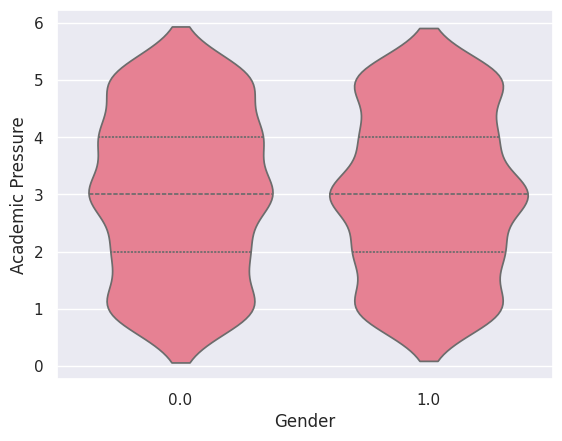

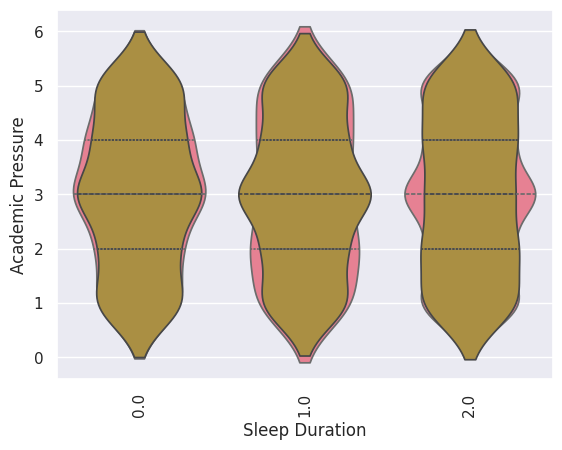

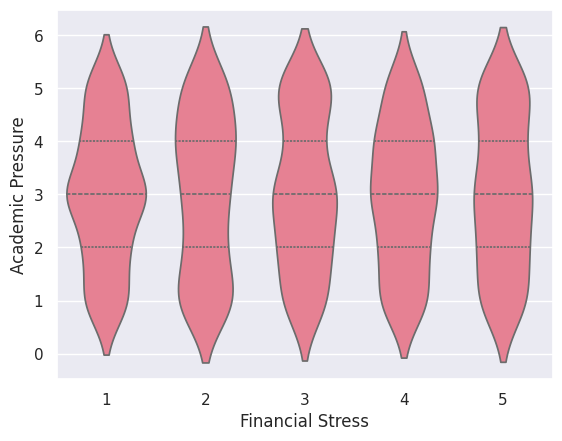

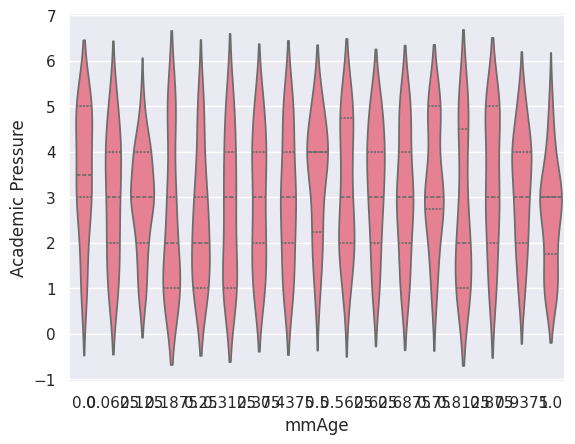

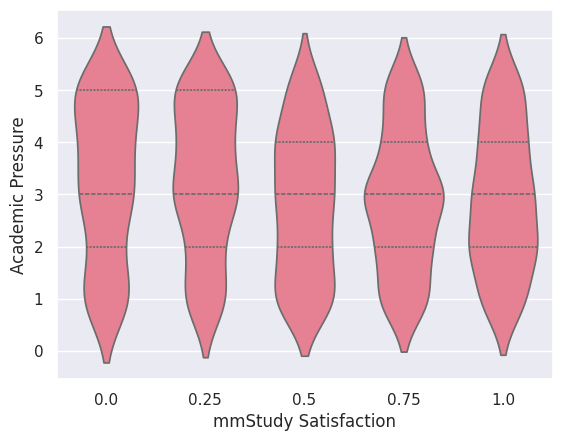

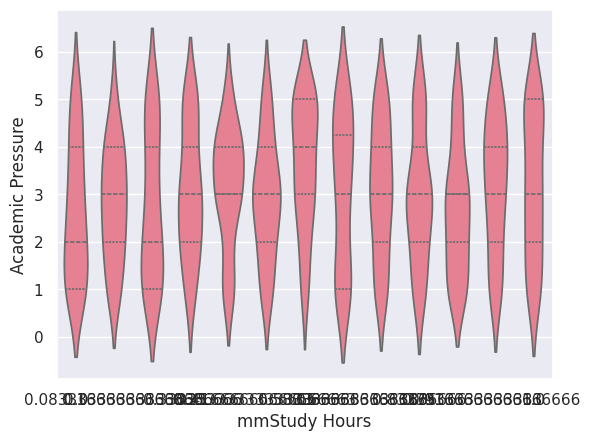

In [ ]:
sns.violinplot(y='Academic Pressure', x='Gender', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Academic Pressure', x='Sleep Duration', data=dataset, inner='quartile')
plt.xticks(rotation=90)
sns.violinplot(y='Academic Pressure', x='Dietary Habits', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Academic Pressure', x='Financial Stress', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Academic Pressure', x='mmAge', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Academic Pressure', x='mmStudy Satisfaction', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Academic Pressure', x='mmStudy Hours', data=dataset, inner='quartile')
plt.show()

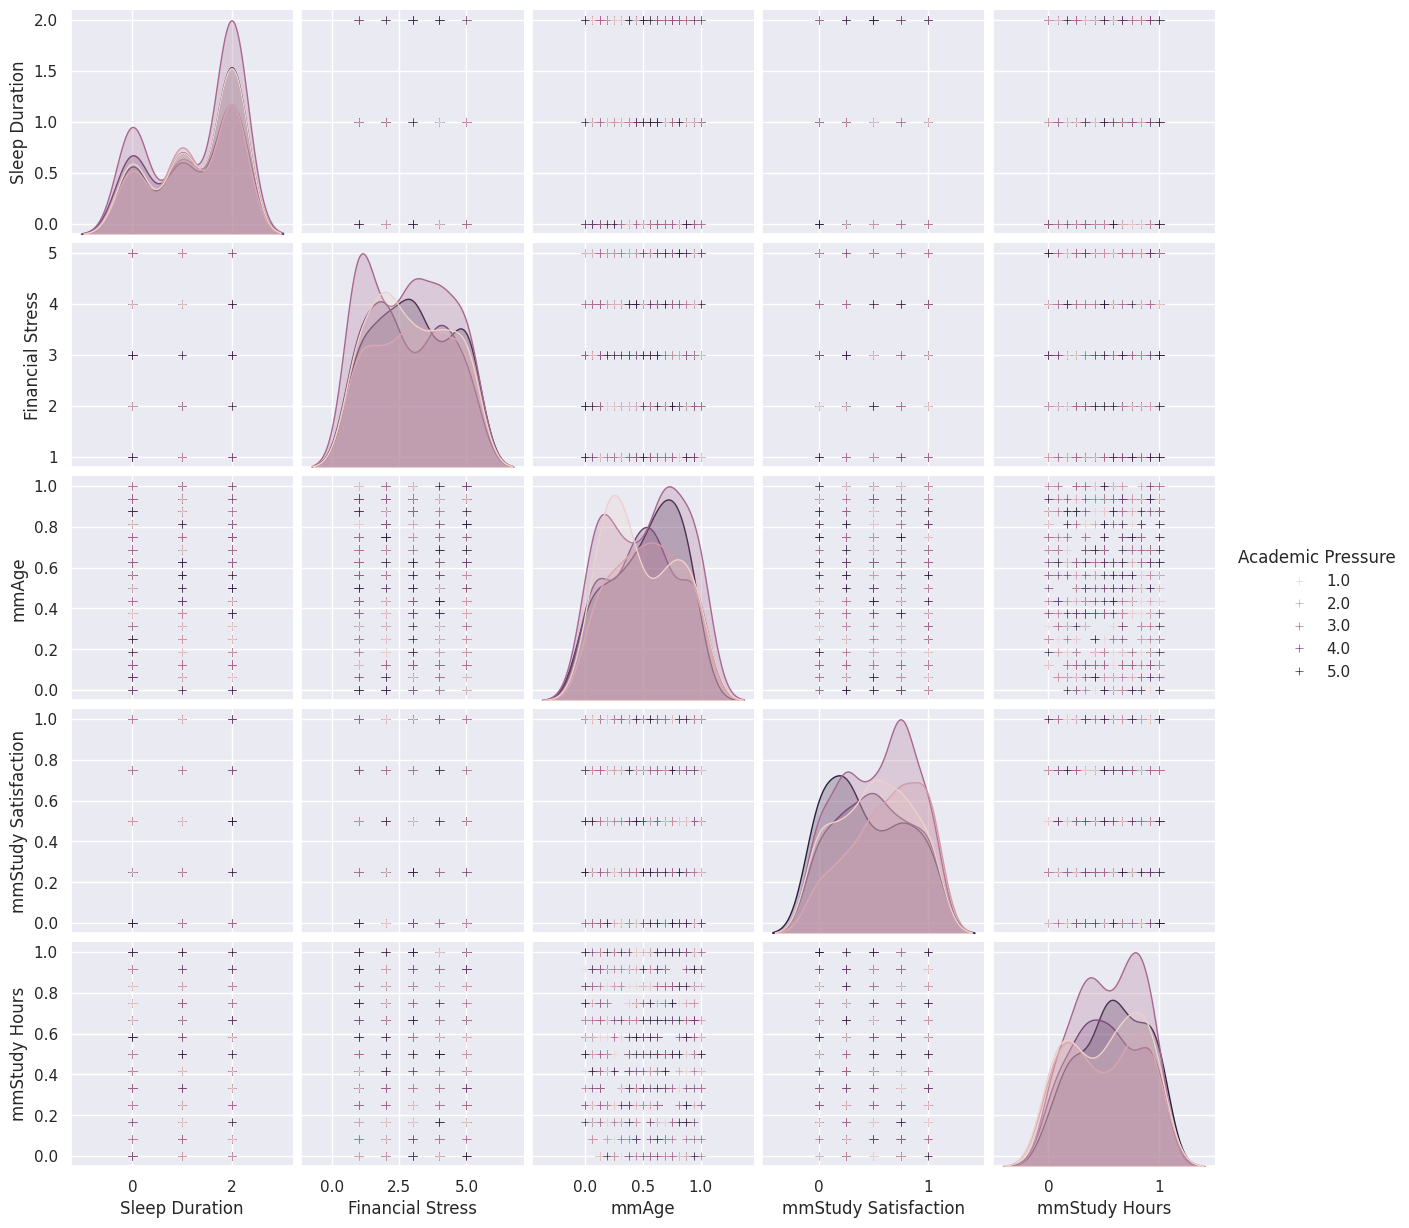

In [ ]:
sns.pairplot(dataset, hue='Academic Pressure', x_vars=["Sleep Duration", "Financial Stress", "mmAge", "mmStudy Satisfaction", "mmStudy Hours"], y_vars=["Sleep Duration", "Financial Stress", "mmAge", "mmStudy Satisfaction", "mmStudy Hours"], markers='+')
plt.show()

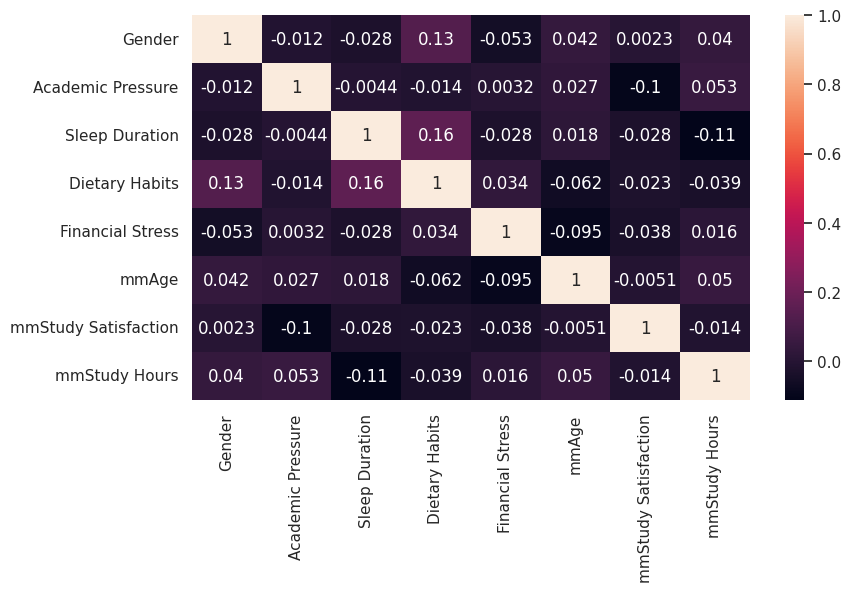

In [ ]:
plt.figure(figsize=(9,5))
sns.heatmap(dataset.corr(numeric_only = True), annot=True)
plt.show()

**Построение модели**

Разделение набора данных

Y  - целевая переменная, которую предсказываем. В разобранном случае это будет Academic Pressure, то есть академическая нагрузка. В X будет весь набор данных без Y.

In [ ]:
X = dataset.drop(['Academic Pressure'], axis=1)
y = dataset['Academic Pressure']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (502, 7) | y shape: (502,) 


In [ ]:
from sklearn.model_selection import train_test_split
import scipy.stats as stats

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

t_test_result = stats.ttest_ind(a=y_train, b=y_test)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15, stratify=y)
#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

results = []
model_names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=7, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    model_names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.187235 (0.028705)
LDA: 0.184643 (0.016824)
KNN: 0.207199 (0.040883)
CART: 0.177167 (0.020473)
NB: 0.204650 (0.050665)
SVC: 0.229626 (0.037782)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc_model = SVC(gamma='auto')
svc_model.fit(X_train, y_train)

svc_pred_res = svc_model.predict(X_test)

svc_accuracy = accuracy_score(y_test, svc_pred_res)

print(f'SVC accuracy: {svc_accuracy}')

SVC accuracy: 0.24752475247524752


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


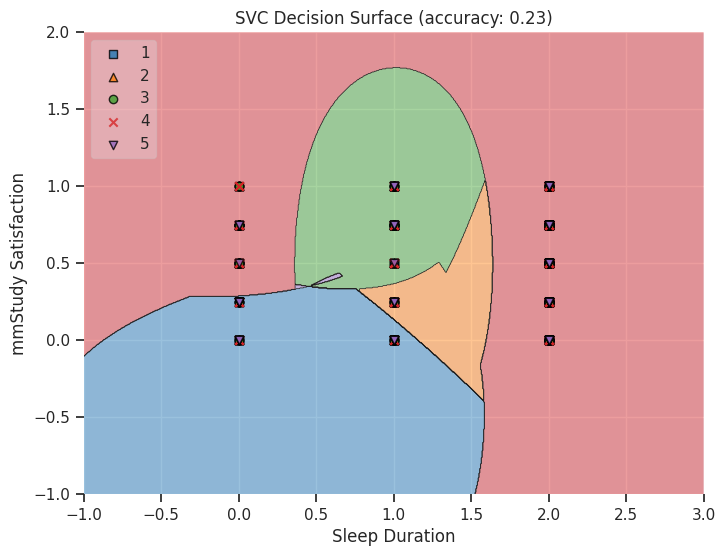

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Для визуализации выберем два признака
X_2d = X_train[['Sleep Duration', 'mmStudy Satisfaction']].values
y_2d = y_train.values.astype(int)  # Преобразуем y в целочисленный тип

# Инициализация и обучение модели SVC с оптимизированными параметрами (или gamma='auto')
svc_model = SVC(gamma='auto')
svc_model.fit(X_2d, y_2d)

# Вычисление точности
svc_pred_res = svc_model.predict(X_test[['Sleep Duration', 'mmStudy Satisfaction']])
svc_accuracy = accuracy_score(y_test, svc_pred_res)

# Визуализация областей решений
plt.figure(figsize=(8, 6))
plt.title(f'SVC Decision Surface (accuracy: {svc_accuracy:.2f})')
plot_decision_regions(X=X_2d, y=y_2d, clf=svc_model, legend=2)

plt.xlabel('Sleep Duration')
plt.ylabel('mmStudy Satisfaction')
plt.show()

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predicted = model.predict(X_test)

In [76]:
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
accuracy = metrics.accuracy_score(y_test, predicted) #точность классификации.
## Precision e Recall
recall = metrics.recall_score(y_test, predicted, average="weighted")
precision = metrics.precision_score(y_test, predicted, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

Recall (all 1s predicted right): 0.26
Precision (confidence when predicting a 1): 0.25
Detail:
              precision    recall  f1-score   support

         1.0       0.15      0.10      0.12        20
         2.0       0.26      0.33      0.29        18
         3.0       0.31      0.32      0.31        25
         4.0       0.28      0.39      0.33        18
         5.0       0.21      0.15      0.18        20

    accuracy                           0.26       101
   macro avg       0.24      0.26      0.25       101
weighted avg       0.25      0.26      0.25       101

